# Part 22 of Recipes: Nature Cover Encode Diagram

This page is primarily based on the following page at the Circos documentation site:



- [22. Nature Cover Encode Diagram](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 21 by clicking [here &#8592;](Recipes_Part21.ipynb).



----



8 --- Recipes
=============

22. Nature Cover Encode Diagram
-------------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/nature_cover_encode/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/nature_cover_encode/images){.normal}
[Configuration](/documentation/tutorials/recipes/nature_cover_encode/configuration){.normal}
:::

[Nature\'s special
issue](http://www.nature.com/nature/journal/v489/n7414/index.html)
dedicated to the [Encode Project](http://www.genome.gov/10005107) uses
the Circos motif on its
[cover](http://www.nature.com/nature/journal/v489/n7414/index.html#about-the-cover)
as well as the interactive [Encode
Explorer](http://www.nature.com/encode/), which is available as an [app
at iTunes](https://itunes.apple.com/app/id553487333).

In this tutorial, I\'ll show you how to automatically generate the image
that appears on the cover. The original was created for Nature by [Carl
DeTorres](http://www.carldetorres.com/).

### image elements

The figure contains 23 segments --- these are human chromosomes 1--22
and chromosome X. The proportions in the figure aren\'t exactly the same
as the lengths of the assembled chromosomes in the hg19 human assembly.
Here, we\'ll use the assembled lengths.

The color scheme used is is a pleasant range of pastel hues that cycle
through orange, green, blue and purple. We\'ll redefine the default
chromosome colors to make use of this color scheme.

The data in the figure is shown in six concentric tracks, whose spacing
decreases slightly towards the inside of the circle. Each track appears
to highlight fixed-width regions, colored after the chromosome color
scheme. I don\'t know how the data tracks were populated, whether the
data are randomly placed, designed for visual effect, or drawn from an
actual Encode data set. In this example, we\'ll create the tracks using
a random scheme.

### color scheme

I sampled the RGB colors from the cover image and obtained the following
values, which I\'ve placed in a [\<colors\>]{.syn-block} block. The `*`
suffix overrides existing color definitions.

```ini
# circos.conf
<<include etc/colors_fonts_patterns.conf>>
<colors>
chr1*  = 163,132,130
chr2*  = 188,162,118
chr3*  = 216,196,96
chr4*  = 233,212,56
chr5*  = 229,229,50
chr6*  = 212,222,56
chr7*  = 195,215,57
chr8*  = 177,209,58
chr9*  = 160,204,61
chr10* = 139,198,61
chr11* = 128,193,95
chr12* = 115,186,126
chr13* = 102,183,152
chr14* = 91,178,176
chr15* = 61,174,199
chr16* = 36,170,224
chr17* = 75,129,194
chr18* = 85,111,180
chr19* = 92,92,168
chr20* = 98,70,156
chr21* = 101,45,145
chr22* = 121,74,141
chrx*  = 140,104,137
</colors>
```


The background of the image is set in the [\<image\>]{.syn-block} block.
The `*` suffix is used to overwrite values of parameters set elsewhere
in the block (e.g., here defined in the included file `etc/image.conf`).

```ini
<image>
<<include etc/image.conf>>
background* = black
</image>
```


### track positions

Each track has the same data source but has a different appearance
because of dynamic rules that alter the data randomly.

The definition of each track is actually the same, but includes
dynamically changing fields called counters that change the position of
each track. The figure with 7 tracks is created like this

```ini
# variables used in each plot.conf block
```


```ini
plot_width   = 80 
plot_padding = 25 
num_plots    = 6  
```


```ini
<plots>
type             = highlight
file             = bins.txt
stroke_thickness = 0
<<include plot.conf>>
<<include plot.conf>>
<<include plot.conf>>
<<include plot.conf>>
<<include plot.conf>>
<<include plot.conf>>
<<include plot.conf>>
</plots>
```


where the `plot.conf` file is

```ini
<plot>
r1   = dims(ideogram,radius_inner)
- conf(plot_padding)*eval(remap(counter(plot),0,conf(num_plots),1,0.9))
- eval((conf(plot_width)+conf(plot_padding))*counter(plot)*eval(remap(counter(plot),0,conf(num_plots),1,0.9)))
r0   = conf(.,r1)
- conf(plot_width)*eval(remap(counter(plot),0,conf(num_plots),1,0.9))
post_increment_counter = plot:1
<<include rules.conf>>
</plot>
```


The inner and outer radii of the the track (`r0` and `r1`) are computed
using the value of the `plot_padding` and `plot_width` parameters. Each
time a plot is drawn, the value of the variable `counter(plot`) is
incremented by 1.

The `dims(ideogram,radius_inner`) variable refers to the position of the
inner radius of the ideograms. The function
`remap(VAR,MIN,MAX,TARGETMIN,TARGETMAX`) is used to remap the variable
`VAR` from the range `[MIN,MAX]` to `[TARGETMIN,TARGETMAX]`. The
expressions are designed so that the spacing between the tracks
decreases slightly towards the center of the circle, to match the
appearance of the original image in Nature.

### track data

Each track uses the same data file, `bins.txt`. How is it that the
tracks look different, then?

The data file defines 7.5 Mb bins across the genome

```ini
hs1 0 7499999
hs1 7500000 14999999
hs1 15000000 22499999
hs1 22500000 29999999
...
```


and the color associated with each bin is dynamically altered by rules
that are included in each [\<plot\>]{.syn-block} block, from the file
`rules.conf`.

```ini
# rules.conf
<rules>
```


```ini
<rule>
```


```ini
# Rules with multiple condition 
```


```ini
# The first condition tests that bins are further than 5 Mb from the
# start and end of each ideogram.  This ensures that the color
# for the first/last bin will be the same as the ideogram.
```


```ini
condition  = var(start) >= 5e6 && var(end) < chrlen(var(chr))-5e6
```


```ini
# The probability that the second condition is true is proportional to
# the track counter. Bins in inner tracks are more likely to trigger
# this rule.  Here, rand() is a uniformly distributed random number in
# the range [0,1).
```


```ini
condition  = rand() < remap(counter(plot),0,conf(num_plots)-1,1/conf(num_plots),1) 
```


```ini
# If this rule is true, the color of the bin is changed to that of a
# random ideogram.
```


```ini
fill_color = eval("chr" . (sort {rand() <=> rand()} (1..22,"x"))[0])
```


```ini
</rule>
```


```ini
# If the above rule is not true, the color of the bin is assigned to
# that of its ideogram.
```


```ini
<rule>
condition  = 1
fill_color = eval("chr" . lc substr(var(chr),2))
</rule>
</rules>
```


This is an advanced technique---one meant for designing illustrations
more than for the display of data. However, next time you\'re in the
need of random circular heatmaps, give it a try.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/22/

/home/jovyan/circos-tutorials-0.67/tutorials/8/22


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.41s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.43s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/22
debuggroup summary 0.43s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.43s loading configuration from file circos.conf
debuggroup summary 0.43s found conf file circos.conf
debuggroup summary 0.69s debug will appear for these features: output,summary
debuggroup summary 0.69s bitmap output image ./circos.png
debuggroup summary 0.69s SVG output image ./circos.svg
debuggroup summary 0.69s parsing karyotype and organizing ideograms
debuggroup summary 0.79s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.80s applying global and local scaling
debuggroup summary 0.82s allocating image, colors and brushes
debuggroup summary 2.79s drawing 23 ideograms of total size 3,036,303,869
debuggroup summary 2.79s drawing highlights and ideograms
debuggroup sum

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized val

View the plot in this page using the following cell.

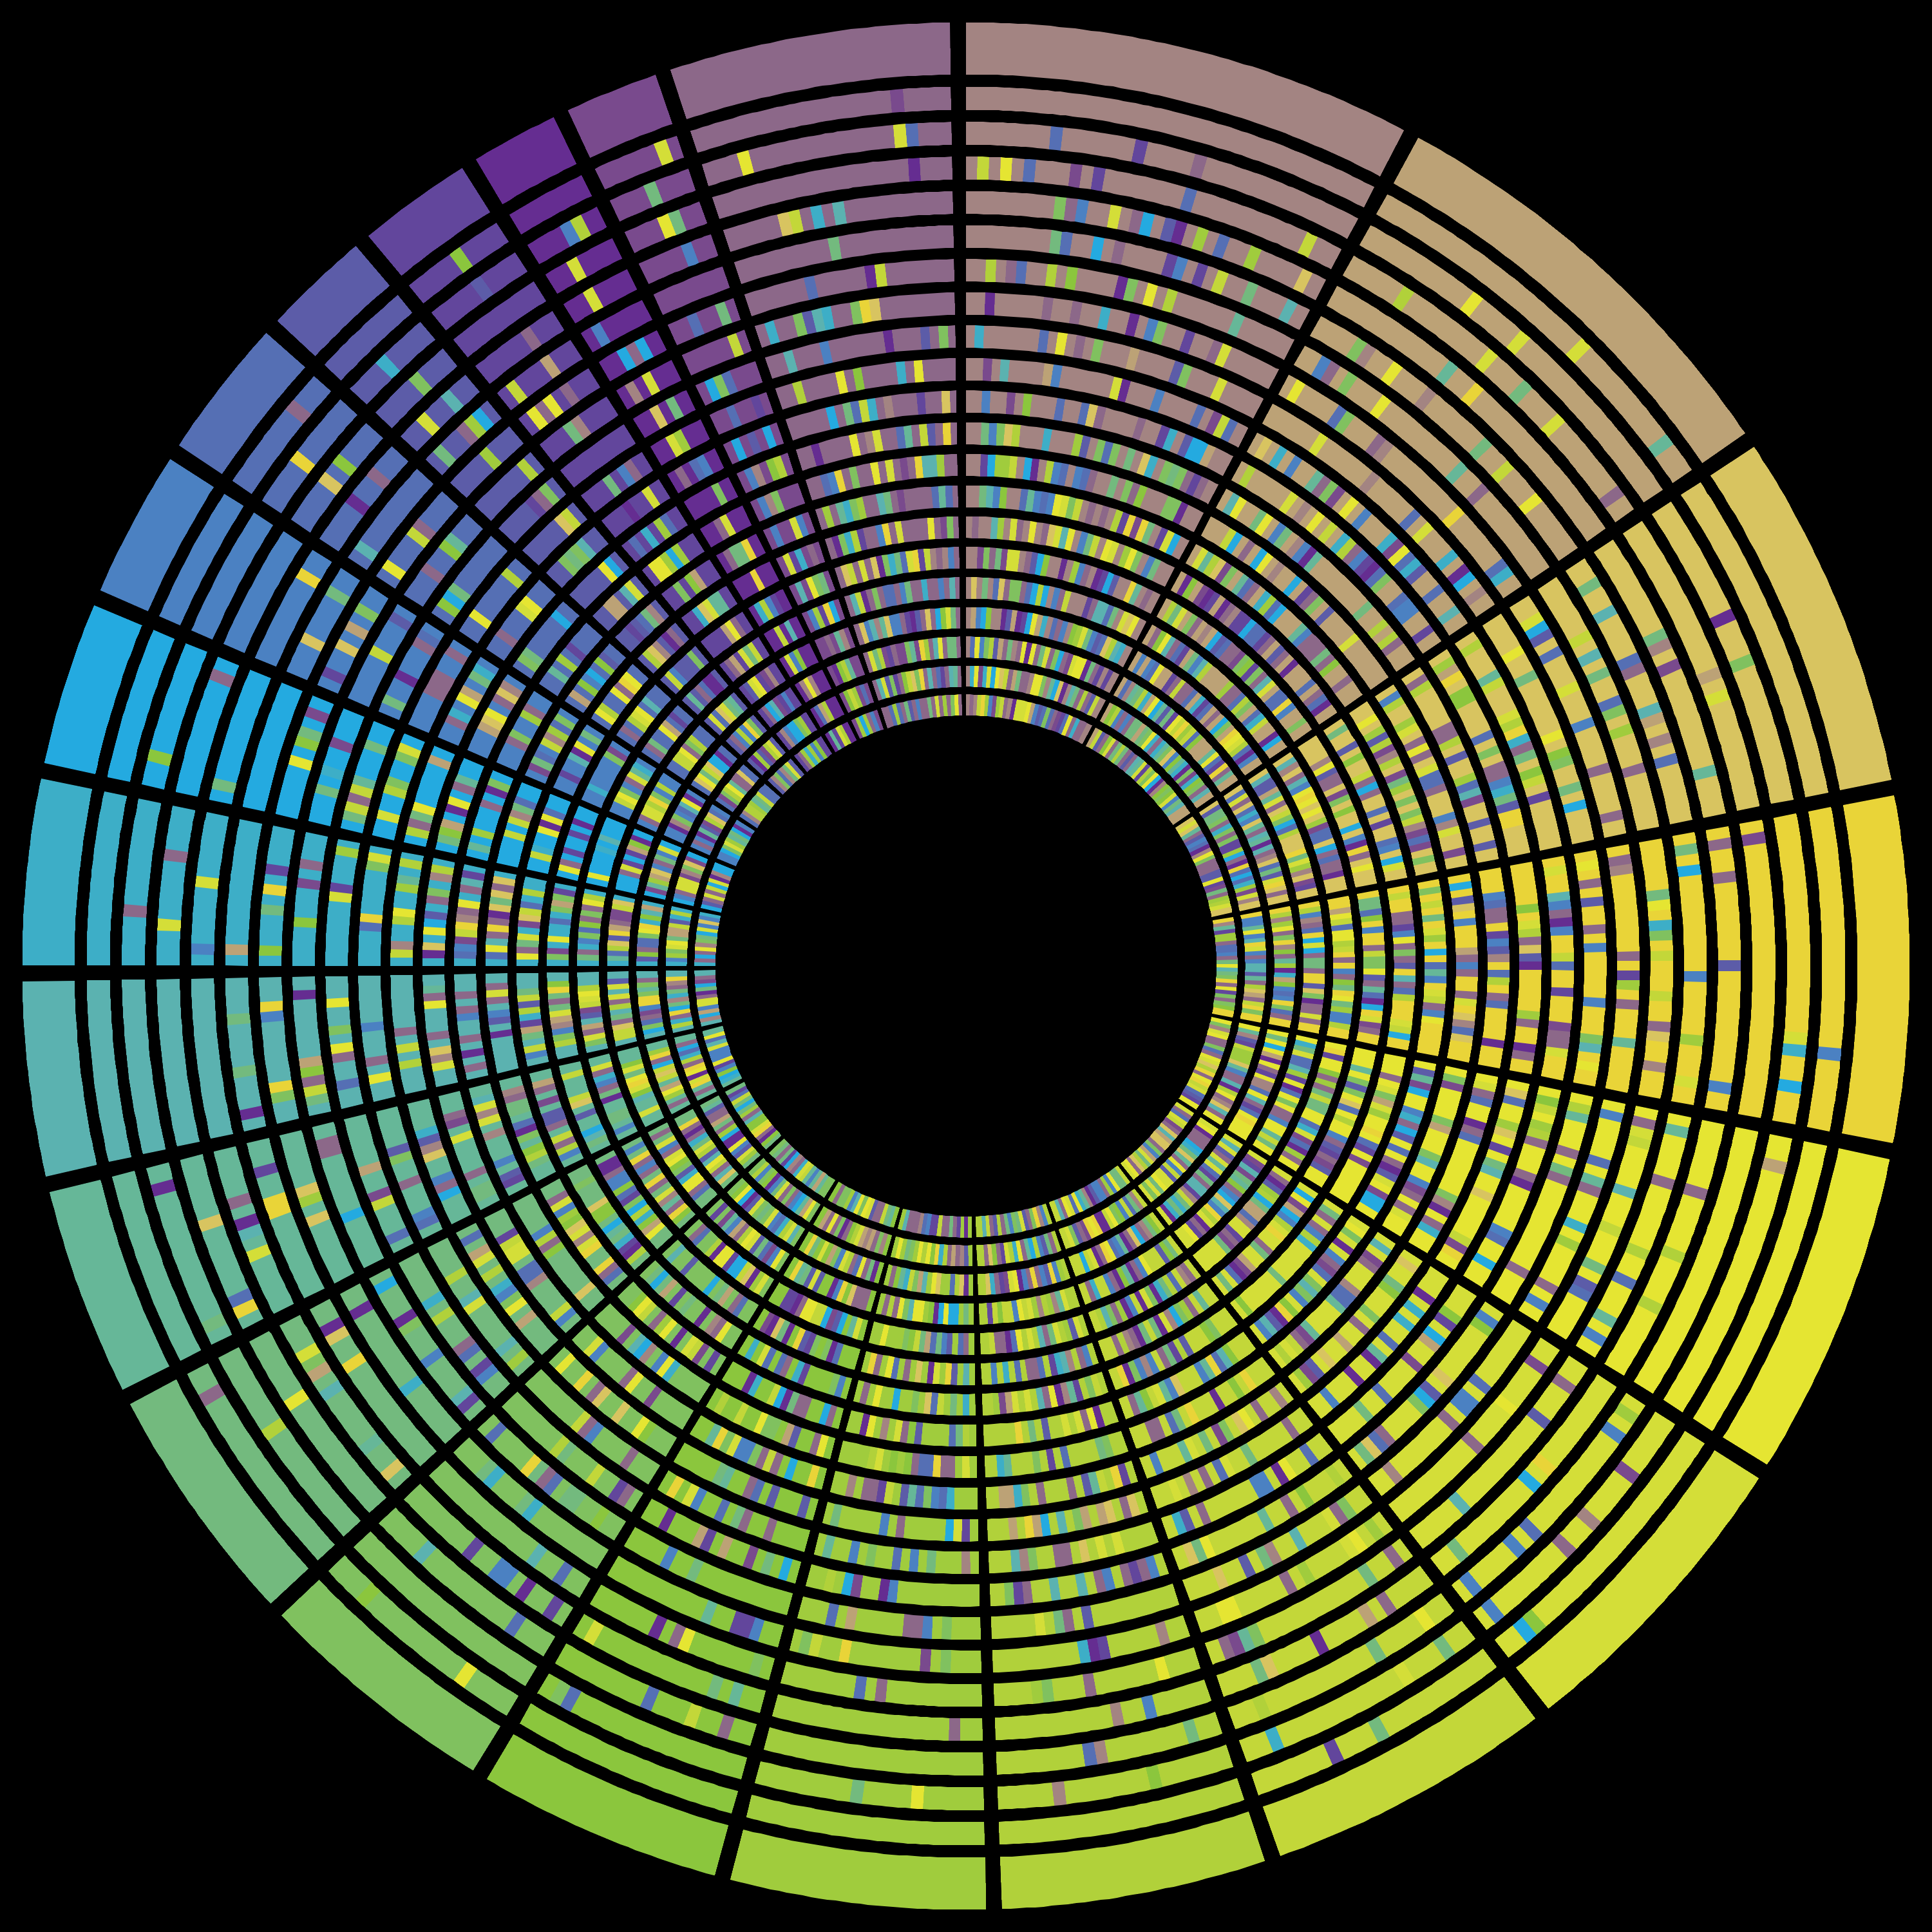

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part23.ipynb).

----